In [1]:
%pylab inline
%config Completer.use_jedi = False

Populating the interactive namespace from numpy and matplotlib


/Users/tliaudat/opt/anaconda3/envs/WF_PSF/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  


In [2]:
import numpy as np
import astropy
from astropy.io import ascii

from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
# Load the CFHTlens data
chftlens_data_path = './martin_Gals/cfhtlens_W3_ok.txt'

mb_data = np.loadtxt(chftlens_data_path)

mb_headers = [
    'ALPHA_J2000',  
    'DELTA_J2000',     
    'MAG_u' , 
    'MAGERR_u',    
    'MAG_g',  
    'MAGERR_g',     
    'MAG_r' , 
    'MAGERR_r',     
    'MAG_i' , 
    'MAGERR_i',     
    'MAG_y' , 
    'MAGERR_y' ,    
    'MAG_z' , 
    'MAGERR_z', 
] 

mb_data.shape

(1407741, 14)

In [4]:
# Load the multi-band catalogue, matched with spectroscopic DEEP2+3 measurements
multi_band_v2_data_path = './multi-band_UNIONS/w3.ugriz.spec.txt'

unions_data = ascii.read(multi_band_v2_data_path)

In [5]:
# Print the catalogue
print(unions_data) 
print('Data keys: ', unions_data.keys())

     RA        Dec        CFIS_ID      u    u_err ... z_err   sg  z_spec zero
----------- ---------- ------------- ------ ----- ... ----- ----- ------ ----
214.5213675 52.7520212 2258286007117 21.542 0.029 ... 0.011 2.265 0.2444  0.0
214.5722966 52.7502435 2258286007145  -99.0 -99.0 ...  0.11 1.751 1.4011  0.0
214.4421597 52.7506248 2258286007149  -99.0 -99.0 ... 0.178 1.206 0.6853  0.0
 214.416452 52.7510622 2258286007153  -99.0 -99.0 ... 0.089 1.611 1.1246  0.0
214.4705147 52.7509707 2258286007155  -99.0 -99.0 ... -99.0 1.668 0.6144  0.0
 214.528252 52.7604401 2258286007158 21.883 0.051 ... 0.004 3.013 0.0642  0.0
214.5280835 52.7520947 2258286007168 22.562 0.061 ... 0.019 1.316 0.8177  0.0
214.4446289  52.752225 2258286007176  -99.0 -99.0 ... 0.039 1.589 0.6812  0.0
214.5325164 52.7517289 2258286007177  -99.0 -99.0 ... -99.0 1.113 0.6777  0.0
214.5087224 52.7534348 2258286007197 23.736 0.125 ...  0.01 1.317 1.3635  0.0
        ...        ...           ...    ...   ... ...   ...   ..

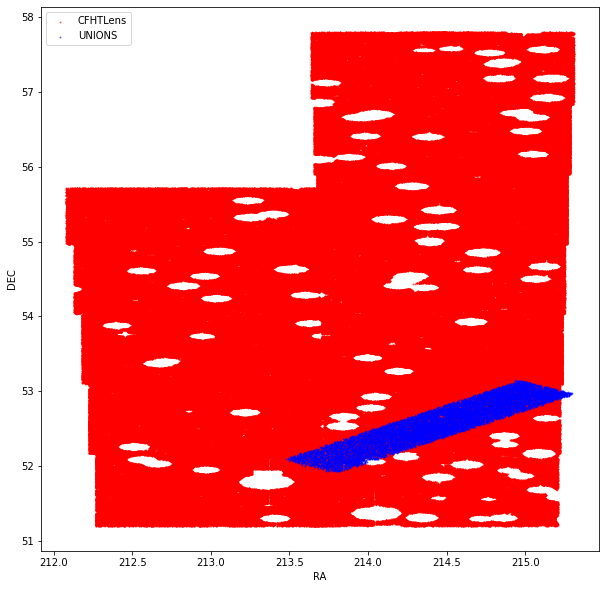

In [6]:
# Plot the positions to check the footpint
plt.figure(figsize=(10,10))
plt.scatter(mb_data[:,0], mb_data[:,1], c='red', s=1, alpha=0.5, label='CFHTLens')
plt.scatter(unions_data['RA'], unions_data['Dec'], c='blue', s=1, alpha=0.5, label='UNIONS')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.show()

In [7]:
# Prepare coordinates: Create SkyCoord class
coord_cfhtlens = SkyCoord(ra=mb_data[:,0], dec=mb_data[:,1], unit='deg')
coord_unions = SkyCoord(ra=unions_data['RA'], dec=unions_data['Dec'], unit='deg')

In [8]:
# Match catalogues
# First catalogue is the one to be matched on the indexes of the second one
idx, sep2d, dist3d = astropy.coordinates.match_coordinates_sky(
    coord_unions,
    coord_cfhtlens,
)

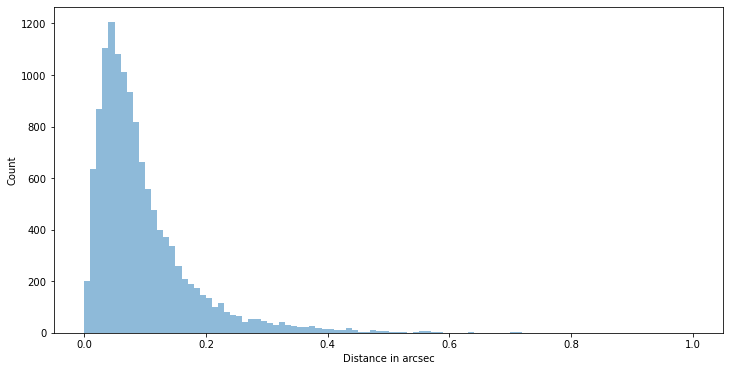

In [9]:
# Plot the histogram of the distance in the matching 
plt.figure(figsize=(12,6))
plt.hist(sep2d.to('arcsec').value, bins=100, alpha=0.5, range=[0,1])
plt.xlabel('Distance in arcsec')
plt.ylabel('Count')
plt.show()

In [10]:
# Create a mask
# - to remove UNION elements outside the CFHTLenS footprint
# - to get cleaner catalogue and remove false matches

mask = sep2d < 0.6 * u.arcsec

print('Total number of elements: ', np.sum(mask))

Total number of elements:  12804


In [11]:
# The idx represent the indexes of the CFHTLenS catalog that match the
# corresponding element in the UNIONS catalogue.
# Do a quick check to make sure we have it right:
print(idx[0])

print(coord_cfhtlens[idx[0]])
print(coord_unions[0])

# (looks good, coordinates are very similar)

335833
<SkyCoord (ICRS): (ra, dec) in deg
    (214.5213669, 52.7520248)>
<SkyCoord (ICRS): (ra, dec) in deg
    (214.5213675, 52.7520212)>


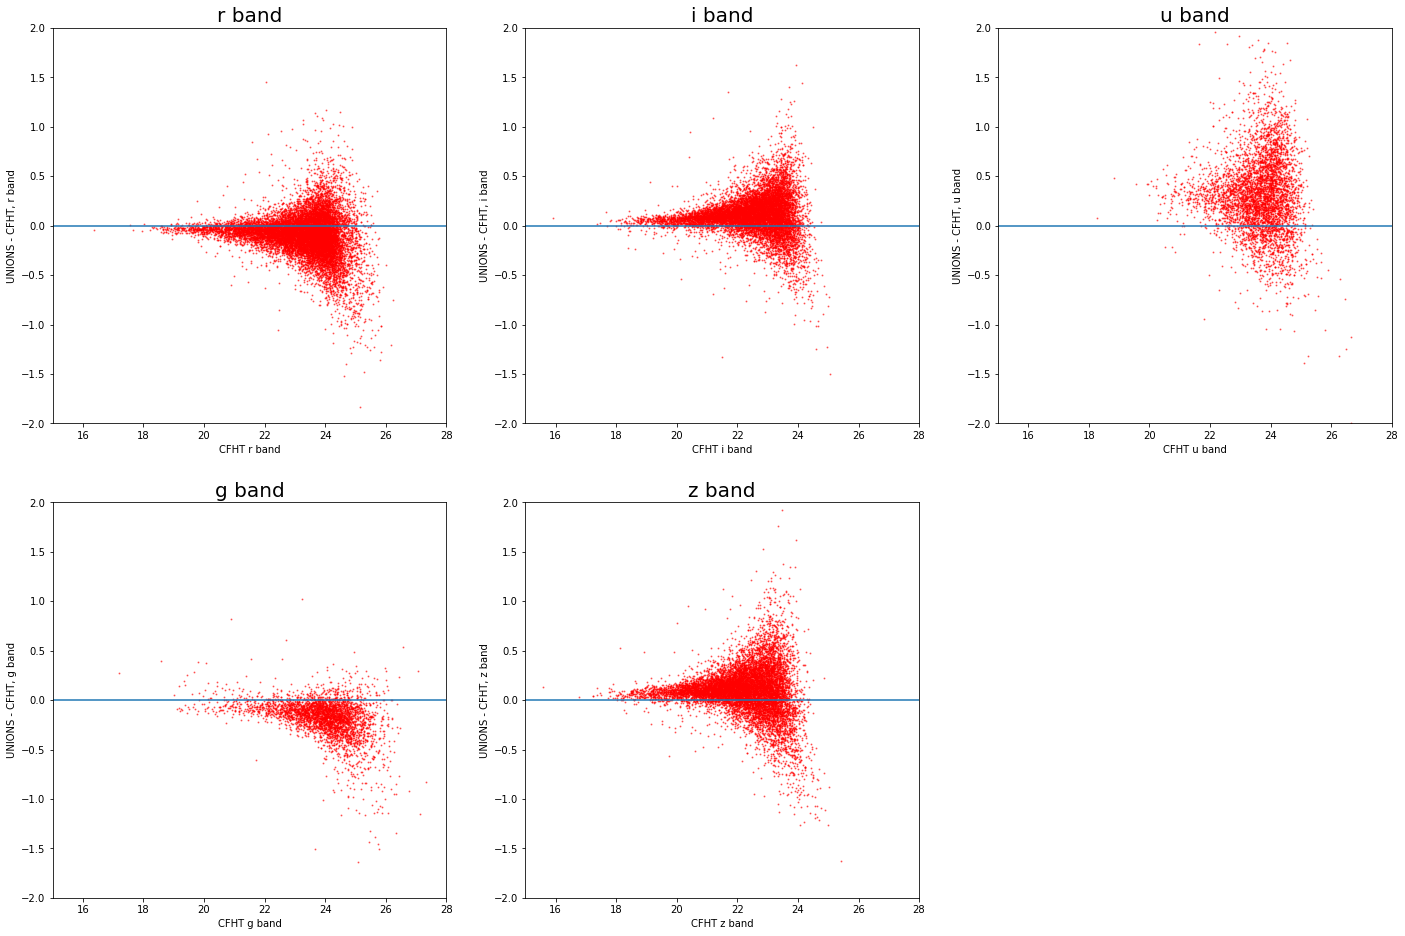

In [12]:
# Scatter plots of magnitude differences of the matched objects on both catalogues

plt.figure(figsize=(24,16))

subplot(231)
plt.scatter(
    mb_data[idx,6][mask],
    unions_data['r'][mask] - mb_data[idx,6][mask],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28)
plt.ylim(-2,2)
plt.xlabel('CFHT r band')
plt.ylabel('UNIONS - CFHT, r band')
plt.title('r band', fontsize=20)

subplot(232)
plt.scatter(
    mb_data[idx,8][mask],
    unions_data['i'][mask] - mb_data[idx,8][mask],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28)
plt.ylim(-2,2)
plt.xlabel('CFHT i band')
plt.ylabel('UNIONS - CFHT, i band')
plt.title('i band', fontsize=20)

subplot(233)
plt.scatter(
    mb_data[idx,2][mask],
    unions_data['u'][mask] - mb_data[idx,2][mask],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28)
plt.ylim(-2,2)
plt.xlabel('CFHT u band')
plt.ylabel('UNIONS - CFHT, u band')
plt.title('u band', fontsize=20)

subplot(234)
plt.scatter(
    mb_data[idx,4][mask],
    unions_data['g'][mask] - mb_data[idx,4][mask],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28)
plt.ylim(-2,2)
plt.xlabel('CFHT g band')
plt.ylabel('UNIONS - CFHT, g band')
plt.title('g band', fontsize=20)

subplot(235)
plt.scatter(
    mb_data[idx,12][mask],
    unions_data['z'][mask] - mb_data[idx,12][mask],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28)
plt.ylim(-2,2)
plt.xlabel('CFHT z band')
plt.ylabel('UNIONS - CFHT, z band')
plt.title('z band', fontsize=20)

plt.show()

In [13]:
# Mask to select the objects that are detected in all the band
# Exception: Using the i or y band in CFHTenS, since objects are observed in either i or y
# (y is new version of i)

mask_det =  (abs(unions_data['u'][mask]) < 98) &\
            (abs(unions_data['g'][mask]) < 98) &\
            (abs(unions_data['r'][mask]) < 98) &\
            (abs(unions_data['i'][mask]) < 98) &\
            (abs(unions_data['z'][mask]) < 98) &\
            (abs(mb_data[idx,2][mask]) < 98) &\
            (abs(mb_data[idx,4][mask]) < 98) &\
            (abs(mb_data[idx,6][mask]) < 98) &\
            ((abs(mb_data[idx,8][mask]) < 98) | (abs(mb_data[idx,10][mask]) < 98)) &\
            (abs(mb_data[idx,12][mask]) < 98)

print('Total number of elements: ', np.sum(mask_det))

Total number of elements:  1199


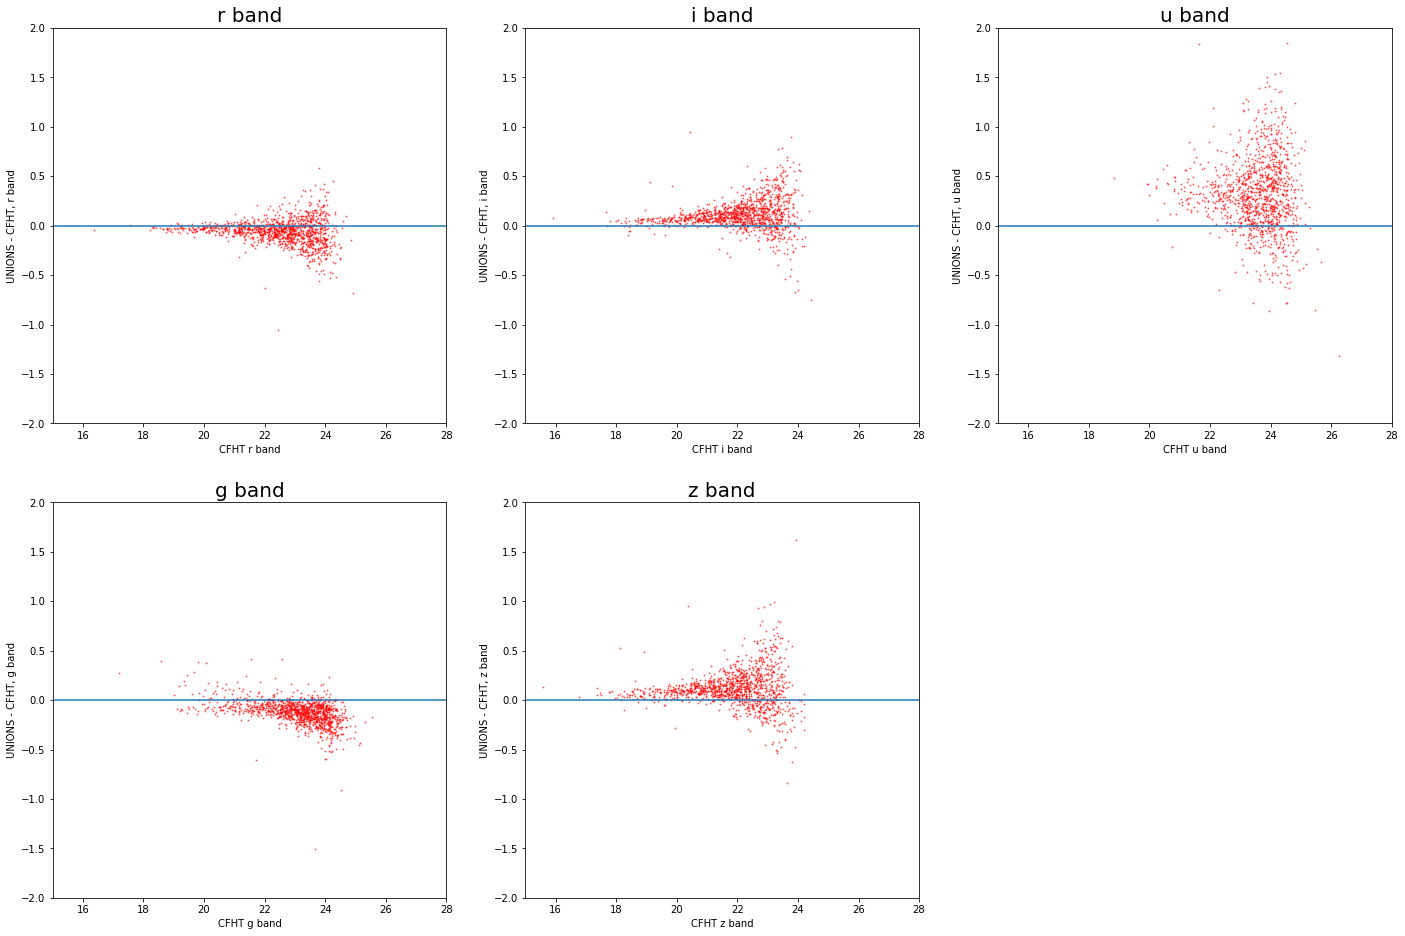

In [14]:
# Scatter plots of magnitude differences of the matched objects on both catalogues
# with the cleaned catalogues

plt.figure(figsize=(24,16))

subplot(231)
plt.scatter(
    mb_data[idx,6][mask][mask_det],
    unions_data['r'][mask][mask_det] - mb_data[idx,6][mask][mask_det],
    c='red', s=1, alpha=0.5
)
plt.hlines(0, 15,28)
plt.xlim(15,28); plt.ylim(-2,2)
plt.xlabel('CFHT r band')
plt.ylabel('UNIONS - CFHT, r band')
plt.title('r band', fontsize=20)

subplot(232)
plt.scatter(
    mb_data[idx,8][mask][mask_det],
    unions_data['i'][mask][mask_det] - mb_data[idx,8][mask][mask_det],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28); plt.ylim(-2,2)
plt.xlabel('CFHT i band')
plt.ylabel('UNIONS - CFHT, i band')
plt.title('i band', fontsize=20)

subplot(233)
plt.scatter(
    mb_data[idx,2][mask][mask_det],
    unions_data['u'][mask][mask_det] - mb_data[idx,2][mask][mask_det],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28); plt.ylim(-2,2)
plt.xlabel('CFHT u band')
plt.ylabel('UNIONS - CFHT, u band')
plt.title('u band', fontsize=20)

subplot(234)
plt.scatter(
    mb_data[idx,4][mask][mask_det],
    unions_data['g'][mask][mask_det] - mb_data[idx,4][mask][mask_det],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28); plt.ylim(-2,2)
plt.xlabel('CFHT g band')
plt.ylabel('UNIONS - CFHT, g band')
plt.title('g band', fontsize=20)

subplot(235)
plt.scatter(
    mb_data[idx,12][mask][mask_det],
    unions_data['z'][mask][mask_det] - mb_data[idx,12][mask][mask_det],
    c='red', s=1, alpha=0.5,
)
plt.hlines(0, 15,28)
plt.xlim(15,28); plt.ylim(-2,2)
plt.xlabel('CFHT z band')
plt.ylabel('UNIONS - CFHT, z band')
plt.title('z band', fontsize=20)

plt.show()

## Megapipe transformations

The transformations can be found in [this page](https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/megapipe/docs/filt.html).


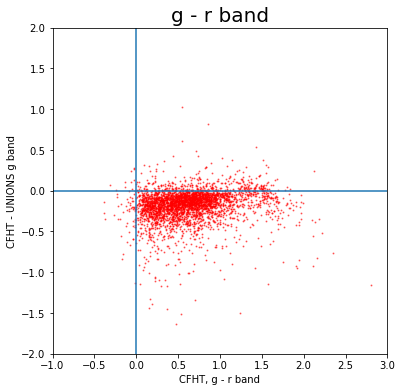

In [15]:
plt.figure(figsize=(6,6))
plt.hlines(0, -2, 3)
plt.vlines(0, -2, 2)

plt.scatter(
    mb_data[idx,4][mask] - mb_data[idx,6][mask],
    unions_data['g'][mask] - mb_data[idx,4][mask],
    c='red', s=1, alpha=0.5,
)

plt.ylim(-2, 2)
plt.xlim(-1, 3)
plt.ylabel('CFHT - UNIONS g band')
plt.xlabel('CFHT, g - r band')
plt.title('g - r band', fontsize=20)
plt.show()


In [16]:

def linear_correction(x):
    # SDSS -> CFIS new filters
    return -0.067*x

def inv_linear_correction(y):
    # SDSS -> CFIS old filters
    return (-1/0.153)*y


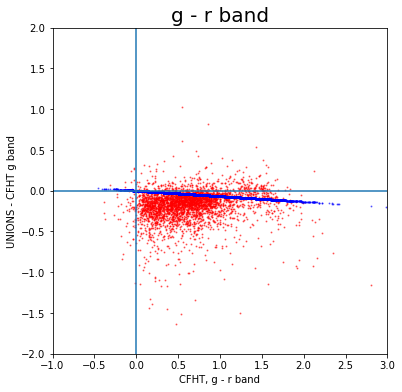

In [17]:

plt.figure(figsize=(6,6))
plt.hlines(0, -2, 3)
plt.vlines(0, -2, 2)

plt.scatter(
    mb_data[idx,4][mask] - mb_data[idx,6][mask],
    unions_data['g'][mask] - mb_data[idx,4][mask],
    c='red', s=1, alpha=0.5,
)

plt.scatter(
    mb_data[idx,4][mask] - mb_data[idx,6][mask],
    linear_correction(mb_data[idx,4][mask] - mb_data[idx,6][mask]),
    c='blue', s=1, alpha=0.5,
)

plt.ylim(-2, 2)
plt.xlim(-1, 3)
plt.ylabel('UNIONS - CFHT g band')
plt.xlabel('CFHT, g - r band')
plt.title('g - r band', fontsize=20)
plt.show()



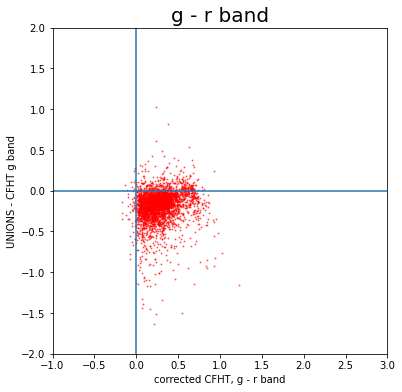

In [18]:
plt.figure(figsize=(6,6))
plt.hlines(0, -2, 3)
plt.vlines(0, -2, 2)

plt.scatter(
    inv_linear_correction(linear_correction(mb_data[idx,4][mask] - mb_data[idx,6][mask])),
    unions_data['g'][mask] - mb_data[idx,4][mask],
    c='red', s=1, alpha=0.5,
)

plt.ylim(-2, 2)
plt.xlim(-1, 3)
plt.ylabel('UNIONS - CFHT g band')
plt.xlabel('corrected CFHT, g - r band')
plt.title('g - r band', fontsize=20)
plt.show()


In [19]:

"""
g_new
(g-r)_sdss
g_old


g_new= m * (g-r)_sdss + b


g_old = m1 * (g-r)_sdss +b1


1/m (g_new - b) = 1/m1 (g_old - b1)

if b=b1=0:
g_new = g_old * (m/m1)

m = -0.067
m1 = -0.153

g_new = m/m1 * (g_old - b1) + b


"""


def g_new_2_g_old(g_old, b, b1):
    m = -0.067
    m1 = -0.153
    
    return (g_old - b1) * (m/m1) + b
    



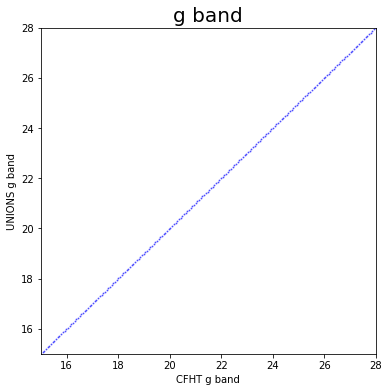

In [20]:


plt.figure(figsize=(6,6))
plt.hlines(0, -2, 3)
plt.vlines(0, -2, 2)

plt.scatter(
    inv_linear_correction(mb_data[idx,4][mask] - mb_data[idx,6][mask]),
    unions_data['g'][mask],
    c='red', s=1, alpha=0.5,
)


straight_line = np.linspace(15,28, num=200)
plt.scatter(
    straight_line,
    straight_line,
    c='blue', s=1, alpha=0.5,
)

plt.ylim(15,28)
plt.xlim(15,28)
plt.xlabel('CFHT g band')
plt.ylabel('UNIONS g band')
plt.title('g band', fontsize=20)
plt.show()



# New session


In [24]:
# mb_data[idx,6][mask] # r band
# mb_data[idx,4][mask] # g band

def g_band_CFHTLens_2_SDSS(g, r):
    
    diff = g-r
    g_SDSS = 0.014 + 0.133 * diff + 0.032 * diff**2 + g
    
    return g_SDSS
    
def g_band_UNIONS_2_SDSS(g, r):
    
    diff = g-r
    g_SDSS = -0.002 + 0.046 * diff + 0.023 * diff**2 + g
    
    return g_SDSS


def z_band_CFHTLens_2_SDSS(i, z):
    
    diff = i-z
    g_SDSS = 0.014 + 0.133 * diff + 0.032 * diff**2 + g
    
    return g_SDSS
    
def z_band_UNIONS_2_SDSS(i, z):
    
    diff = i-z
    g_SDSS = -0.002 + 0.046 * diff + 0.023 * diff**2 + g
    
    return g_SDSS
    

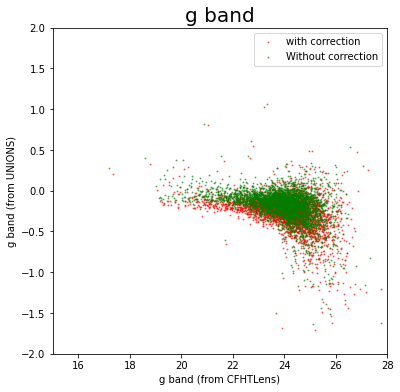

In [32]:

plt.figure(figsize=(6,6))
# plt.hlines(0, -2, 3)
# plt.vlines(0, -2, 2)


g_SDSS_from_CFHTLens = g_band_CFHTLens_2_SDSS(g=mb_data[idx,4][mask], r=mb_data[idx,6][mask])
g_SDSS_from_UNIONS = g_band_UNIONS_2_SDSS(g=unions_data['g'][mask], r=unions_data['r'][mask])


plt.scatter(
    g_SDSS_from_CFHTLens,
    g_SDSS_from_UNIONS - g_SDSS_from_CFHTLens,
    c='red', s=1, alpha=0.5,
    label='with correction',
)

plt.scatter(
    mb_data[idx,4][mask],
    unions_data['g'][mask] - mb_data[idx,4][mask],
    c='green', s=1, alpha=0.5,
    label='Without correction',
)


# straight_line = np.linspace(16,28, num=200)
# plt.scatter(
#     straight_line,
#     straight_line,
#     c='blue', s=1, alpha=0.5,
# )

plt.legend()

plt.ylim(-2,2)
plt.xlim(15,28)
plt.xlabel('g band (from CFHTLens)')
plt.ylabel('g band (from UNIONS)')
plt.title('g band', fontsize=20)
plt.show()




